# Regresi Sederhana

In [70]:

import pandas as pd

df = pd.read_csv("../Data/socr.csv")

df.head()


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


## Data Pre-processing

In [31]:
df_preprocessed = (
    df[["Height(Inches)", "Weight(Pounds)"]].rename(
        columns={"Height(Inches)": "tinggi_cm", "Weight(Pounds)": "berat_kg"}
    ).assign(
        berat_kg=lambda x: x["berat_kg"] * 0.453592,
        tinggi_cm=lambda x: x["tinggi_cm"] * 2.54,
    ).round(
        {
            "berat_kg": 2,
            "tinggi_cm": 2,
        }
    )
).copy()

df_preprocessed.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


## Membagi Dataset Training dan Testing

In [55]:
from sklearn.model_selection import train_test_split

X = df_preprocessed[["tinggi_cm"]]
y = df_preprocessed["berat_kg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Training Model Regresi Linear

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluasi Model

In [59]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm2) = ", model.coef_[0])
print("Intercept (kg) = ", model.intercept_)
print("R^2 = ", r2)
print("MAE (kg) = ", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE (kg) = ", mse)
print("RMSE (kg) = ", rmse)

Koefisien (kg per cm2) =  0.5484512722725067
Intercept (kg) =  -37.073385544388124
R^2 =  0.2605750071137105
MAE (kg) =  3.64450664728533
MSE (kg) =  21.086814021558382
RMSE (kg) =  4.592038111945325


## Persamaan Regresi Linear

In [35]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan Regresi Linear: berat_kg = {slope:.3f} * tinggi_cm + {intercept:.3f}")


Persamaan Regresi Linear: berat_kg = 0.548 * tinggi_cm + -37.073


## Plot Regresi Linear

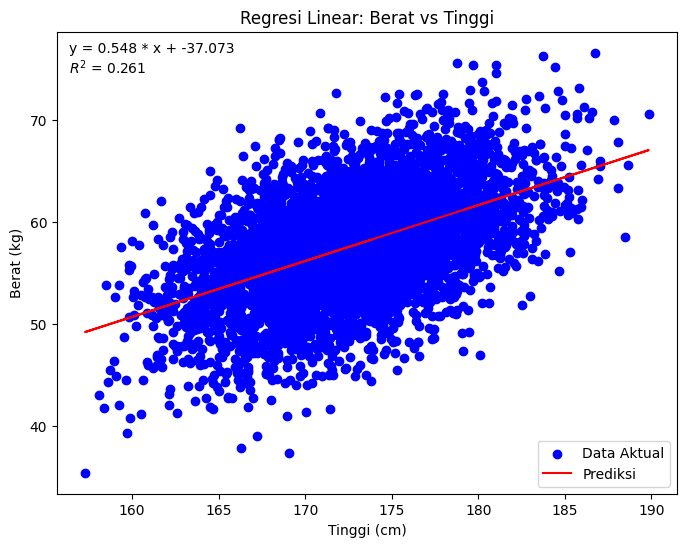

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")
plt.plot(X_test, y_pred, color="red", label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98, f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}", transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.show()

## Visualisasi Data Training dan Testing

In [79]:
import pandas as pd
import numpy as np

# Data for prediction
data = [
    {"Nama": "raffa", "tinggi_cm": 168, "Berat Aktual (kg)": 58.5},
    {"Nama": "tiara", "tinggi_cm": 162, "Berat Aktual (kg)": 78.2},
    {"Nama": "tia", "tinggi_cm": 155, "Berat Aktual (kg)": 52.7},
    {"Nama": "keyla", "tinggi_cm": 160, "Berat Aktual (kg)": 70.3},
    {"Nama": "bani", "tinggi_cm": 183, "Berat Aktual (kg)": 65.8}
]

df_pred = pd.DataFrame(data)

df_pred["Berat Prediksi (kg)"] = model.predict(df_pred[["tinggi_cm"]])

df_pred["Selisih (kg)"] = df_pred["Berat Aktual (kg)"] - df_pred["Berat Prediksi (kg)"]
denom = df_pred["Berat Aktual (kg)"].replace(0, np.nan)
df_pred["Akurasi (%)"] = (1 - abs(df_pred["Selisih (kg)"] / denom)).clip(lower=0, upper=1) * 100

df_pred


,Nama,tinggi_cm,Berat Aktual (kg),Berat Prediksi (kg),Selisih (kg),Akurasi (%)
0,raffa,168,58.5,55.066428,3.433572,94.130646
1,tiara,162,78.2,51.775721,26.424279,66.209361
2,tia,155,52.7,47.936562,4.763438,90.961218
3,keyla,160,70.3,50.678818,19.621182,72.089357
4,bani,183,65.8,63.293197,2.506803,96.190269


In [49]:
y_pred_test = model.predict(X_test)

hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

hasil["Selisih (kg)"] = hasil["Berat Aktual (kg)"] - hasil["Berat Prediksi (kg)"]

denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - abs(hasil["Selisih (kg)"] / denom)).clip(lower=0, upper=1) * 100

,Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih (kg),Akurasi (%)
0,173.80,60.91,58.247446,2.662554,95.628707
1,172.46,50.79,57.512521,-6.722521,86.764086
2,171.85,61.68,57.177966,4.502034,92.700982
3,175.29,57.33,59.064638,-1.734638,96.974293
4,175.29,45.44,59.064638,-13.624638,70.016202
...,...,...,...,...,...
4995,175.10,62.64,58.960432,3.679568,94.125850
4996,170.90,47.72,56.656937,-8.936937,81.272136
4997,174.17,64.04,58.450373,5.589627,91.271662
4998,170.42,58.75,56.393680,2.356320,95.989243


# Multiple Linear Regression

In [80]:
df = pd.read_csv("../Data/stunting.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


## Statistik Deskriptif

In [60]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


## Data Pre-processing

In [91]:
df_preprocessed = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
                   .rename(
    columns={"Jenis Kelamin": "jk", "Umur (bulan)": "umur_bulan", "Tinggi Badan (cm)": "tinggi_cm",
             "Berat Badan (kg)": "berat_kg"}
).assign(
    jk=lambda x: x["jk"].map({"Laki-laki": 1, "Perempuan": 0}),
)
                   .copy()
                   )

df_preprocessed.head()

,berat_kg,jk,umur_bulan,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


## Analisis Korelasi

In [117]:
corr_matrix = df_preprocessed.corr()
print(corr_matrix)

            berat_kg        jk  umur_bulan  tinggi_cm
berat_kg    1.000000  0.045797    0.665389   0.626005
jk          0.045797  1.000000    0.004046   0.073505
umur_bulan  0.665389  0.004046    1.000000   0.875869
tinggi_cm   0.626005  0.073505    0.875869   1.000000


## Heatmap Grafik Korelasi

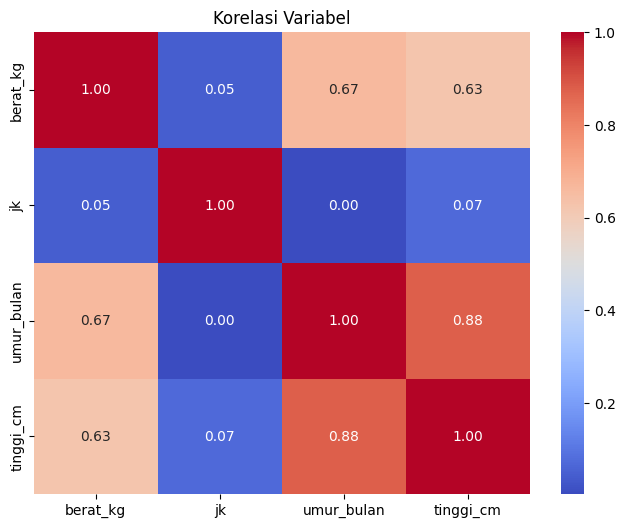

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Variabel")
plt.show()

## Membagi Dataset Training dan Testing

In [96]:
from sklearn.model_selection import train_test_split

X = df_preprocessed[["umur_bulan", "tinggi_cm"]]
y = df_preprocessed["berat_kg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()

,umur_bulan,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


## Pelatihan Model Regresi Linear Berganda

In [97]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bulan,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [113]:
model = sm.OLS(y_train, X_train_const).fit()
print("-----------------------")
print(model.params)
print("-----------------------")

const = model.params["const"]
x1_umur = model.params["umur_bulan"]
x2_tinggi = model.params["tinggi_cm"]

print(
    f"Persamaan Regresi Linear Berganda: berat_kg = {x1_umur:.3f} * umur_bulan + {x2_tinggi:.3f} * tinggi_cm + {const:.3f}")

-----------------------
const         2.545617
umur_bulan    0.229719
tinggi_cm     0.054192
dtype: float64
-----------------------
Persamaan Regresi Linear Berganda: berat_kg = 0.230 * umur_bulan + 0.054 * tinggi_cm + 2.546


In [114]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:25:00   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

## Pengujian Model Regresi Linear Berganda

In [116]:
X_test_const = sm.add_constant(X_test)
y_pred_test = model.predict(X_test_const)

hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bulan"].to_numpy(),
    "Tinggi Badan (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

hasil["Selisih (kg)"] = hasil["Berat Aktual (kg)"] - hasil["Berat Prediksi (kg)"]

denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)

hasil["Akurasi (%)"] = (1 - abs(hasil["Selisih (kg)"] / denom)).clip(lower=0, upper=1) * 100

hasil

,Umur (bulan),Tinggi Badan (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,1.265774,81.917510
80184,8,66.0,12.2,7.960047,4.239953,65.246290
19864,20,90.0,10.9,12.017284,-1.117284,89.749692
76699,13,82.4,9.6,9.997392,-0.397392,95.860500
92991,11,70.1,13.2,8.871391,4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,3.539784,70.001830
29313,15,80.2,9.6,10.337607,-0.737607,92.316595
37862,8,61.9,8.0,7.737860,0.262140,96.723246
53421,12,74.9,5.4,9.361232,-3.961232,26.643845
